In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [5]:
path = "C:/Users/megar/OneDrive/Documenten/Business Analytics Management/Exchange/Course/Predictive Analytics/Group assignment/DBA3803/Data"
os.chdir(path)
print(os.getcwd())

C:\Users\megar\OneDrive\Documenten\Business Analytics Management\Exchange\Course\Predictive Analytics\Group assignment\DBA3803\Data


In [6]:
df = pd.read_csv('flights_final.csv')

In [7]:
# Create a subset
# Randomly sample 1/6th of the data
sub_df = df.sample(frac=1/6, random_state=0).reset_index(drop=True)
print(sub_df.shape)

# Think about stratification, we can do this on the amound of days or the independent value
# Stratified sampling based on 'AIRLINE'
# sub_df = df.groupby('AIRLINE', group_keys=False).apply(lambda x: x.sample(frac=1/6, random_state=0)).reset_index(drop=True)
# print(sub_df.shape)

(99196, 31)


In [8]:
pd.set_option('display.max_columns', None)
print(sub_df.head())

   YEAR  MONTH   DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1  21.0          3.0      AS          386.0      N788AS   
1  2015      1   4.0          7.0      HA           29.0      N390HA   
2  2015      1   4.0          7.0      WN         1934.0      N7727A   
3  2015      1  21.0          3.0      WN          833.0      N741SA   
4  2015      1   9.0          5.0      WN          113.0      N230WN   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
0            SFO                 PSP               2140.0          2133.0   
1            SEA                 OGG               1000.0           957.0   
2            SNA                 SMF               1410.0          1423.0   
3            PHX                 IND               1155.0          1154.0   
4            SMF                 ONT               1530.0          1527.0   

   DEPARTURE_DELAY  TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  ELAPSED_TIME  \
0             -7.0      12.0  

In [9]:
sub_df = sub_df.drop(['YEAR', 'TAIL_NUMBER', 'DEPARTURE_TIME', 'TAXI_OUT', 'WHEELS_OFF', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 'DIVERTED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'], axis=1)
print(sub_df.head(2)) 

   MONTH   DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
0      1  21.0          3.0      AS          386.0            SFO   
1      1   4.0          7.0      HA           29.0            SEA   

  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_TIME  \
0                 PSP               2140.0             -7.0            79.0   
1                 OGG               1000.0             -3.0           370.0   

   DISTANCE  SCHEDULED_ARRIVAL  ARRIVAL_DELAY  CANCELLED  
0     421.0             2259.0           -5.0        0.0  
1    2640.0             1410.0           -7.0        0.0  


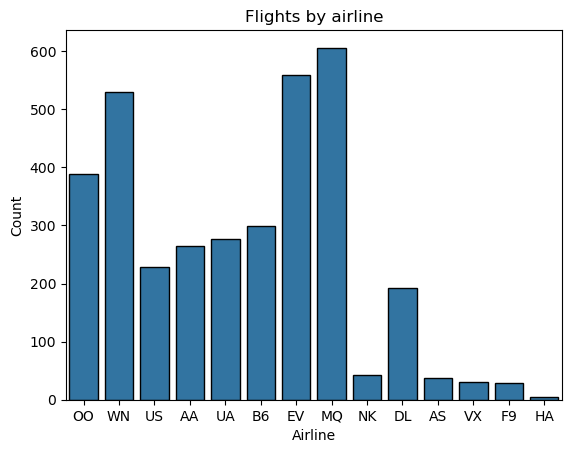

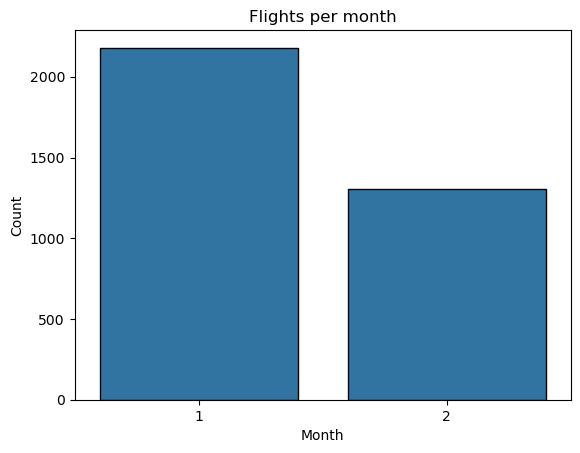

     MONTH   DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
22       1  18.0          7.0      OO         5615.0            SBA   
78       2   1.0          7.0      WN         4649.0            ATL   
107      1   8.0          4.0      US         2126.0            DCA   

    DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_TIME  \
22                  SFO               1414.0              NaN            71.0   
78                  MDW               1645.0              NaN           120.0   
107                 BOS               1830.0              NaN            85.0   

     DISTANCE  SCHEDULED_ARRIVAL  ARRIVAL_DELAY  CANCELLED  
22      262.0             1525.0            NaN        1.0  
78      591.0             1745.0            NaN        1.0  
107     399.0             1955.0            NaN        1.0  
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
ORIGIN_AIRPORT       

In [10]:
sub_df_1 = sub_df[sub_df['ARRIVAL_DELAY'].isna()]

sns.countplot(data=sub_df_1, x='AIRLINE', color="#1f77b4", edgecolor='black')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Flights by airline')
plt.show()

sns.countplot(data=sub_df_1, x='MONTH', color="#1f77b4", edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Flights per month')
plt.show()

print(sub_df_1.head(3)) 

# na in ARRIVAL_DELAY and DEPARTURE_DELAY will be dropped as they regard cancelled flights

sub_df_2 = sub_df[sub_df['CANCELLED'] != 1]
sub_df_2 = sub_df_2.dropna(subset=['ARRIVAL_DELAY'])
print(sub_df_2.isnull().sum())

In [11]:
# Binary variable for 'Flight_delayed'
sub_df_2['departure_delayed'] = sub_df_2['DEPARTURE_DELAY'].apply(lambda x: 1 if x > 0 else 0)
sub_df_2['arrival_delayed'] = sub_df_2['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 0 else 0)
print(sub_df_2.head(10))

   MONTH   DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
0      1  21.0          3.0      AS          386.0            SFO   
1      1   4.0          7.0      HA           29.0            SEA   
2      1   4.0          7.0      WN         1934.0            SNA   
3      1  21.0          3.0      WN          833.0            PHX   
4      1   9.0          5.0      WN          113.0            SMF   
5      1   3.0          6.0      AA         1638.0            MIA   
6      1  14.0          3.0      WN         1963.0            LAX   
7      1   8.0          4.0      NK          895.0            FLL   
8      1   6.0          2.0      US          493.0            PIT   
9      2   1.0          7.0      WN         4138.0            DEN   

  DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_TIME  \
0                 PSP               2140.0             -7.0            79.0   
1                 OGG               1000.0             -3.0           370.0   
2  

In [12]:
# Counting number of occurences grouped by Month and Day
def assign_flight_counts(sub_df_2):
    # Deaprtures
    departure_counts = sub_df_2.groupby(['MONTH', 'DAY', 'ORIGIN_AIRPORT']).size().reset_index(name='NUM_DEPARTURES')

    # Arrivals
    arrival_counts = sub_df_2.groupby(['MONTH', 'DAY', 'DESTINATION_AIRPORT']).size().reset_index(name='NUM_ARRIVALS')

    # Merging back to original dataframe (Departures)
    sub_df_2 = pd.merge(sub_df_2, departure_counts, how='left', on=['MONTH', 'DAY', 'ORIGIN_AIRPORT'])

    # Merging back to original dataframe (Arrivals)
    sub_df_2 = pd.merge(sub_df_2, arrival_counts, how='left', on=['MONTH', 'DAY', 'DESTINATION_AIRPORT'])

    return sub_df_2

sub_df_3 = assign_flight_counts(sub_df_2)

# Reordering columns
cols = sub_df_3.columns.tolist()  # Get the current column order as a list

# Getting index of origin and destination airport for location
origin_index = cols.index('ORIGIN_AIRPORT')
destination_index = cols.index('DESTINATION_AIRPORT')

# Removing duplicated
cols = [col for col in cols if col not in ['NUM_DEPARTURES', 'NUM_ARRIVALS']]

# Insert 'num_departures' after 'ORIGIN_AIRPORT'
cols.insert(origin_index + 1, 'NUM_DEPARTURES') # +1 for correct location

# Insert 'num_arrivals' after 'DESTINATION_AIRPORT'
cols.insert(destination_index + 2, 'NUM_ARRIVALS') # +2 for correct location

sub_df_3 = sub_df_3[cols]

print(sub_df_3.head(3))

   MONTH   DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
0      1  21.0          3.0      AS          386.0            SFO   
1      1   4.0          7.0      HA           29.0            SEA   
2      1   4.0          7.0      WN         1934.0            SNA   

   NUM_DEPARTURES DESTINATION_AIRPORT  NUM_ARRIVALS  SCHEDULED_DEPARTURE  \
0              63                 PSP             7               2140.0   
1              48                 OGG            12               1000.0   
2              21                 SMF            16               1410.0   

   DEPARTURE_DELAY  SCHEDULED_TIME  DISTANCE  SCHEDULED_ARRIVAL  \
0             -7.0            79.0     421.0             2259.0   
1             -3.0           370.0    2640.0             1410.0   
2             13.0            85.0     404.0             1535.0   

   ARRIVAL_DELAY  CANCELLED  departure_delayed  arrival_delayed  
0           -5.0        0.0                  0                0  
1           -7.0 

In [19]:
# change month and day from float to integer
sub_df_3['DAY'] = sub_df_3['DAY'].astype(int)

In [20]:
def calculate_day_of_year(row):
    date = datetime.datetime(year=2015, month=row['MONTH'], day=row['DAY'])  
    return date.timetuple().tm_yday  

sub_df_3['DAY_OF_YEAR'] = sub_df_3.apply(calculate_day_of_year, axis=1)

In [21]:
print(sub_df_3.head(6))

   MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER ORIGIN_AIRPORT  \
0      1   21          3.0      AS          386.0            SFO   
1      1    4          7.0      HA           29.0            SEA   
2      1    4          7.0      WN         1934.0            SNA   
3      1   21          3.0      WN          833.0            PHX   
4      1    9          5.0      WN          113.0            SMF   
5      1    3          6.0      AA         1638.0            MIA   

   NUM_DEPARTURES DESTINATION_AIRPORT  NUM_ARRIVALS  SCHEDULED_DEPARTURE  \
0              63                 PSP             7               2140.0   
1              48                 OGG            12               1000.0   
2              21                 SMF            16               1410.0   
3              78                 IND            14               1155.0   
4              25                 ONT             7               1530.0   
5              45                 DCA            30               1

In [22]:
# Perform one-hot encoding
categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
df_encoded = pd.get_dummies(sub_df_3, columns=categorical_cols, drop_first=True)
print(df_encoded.shape)
print(df_encoded.head(6))

(95710, 653)
   MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  NUM_DEPARTURES  NUM_ARRIVALS  \
0      1   21          3.0          386.0              63             7   
1      1    4          7.0           29.0              48            12   
2      1    4          7.0         1934.0              21            16   
3      1   21          3.0          833.0              78            14   
4      1    9          5.0          113.0              25             7   
5      1    3          6.0         1638.0              45            30   

   SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_TIME  DISTANCE  \
0               2140.0             -7.0            79.0     421.0   
1               1000.0             -3.0           370.0    2640.0   
2               1410.0             13.0            85.0     404.0   
3               1155.0             -1.0           205.0    1488.0   
4               1530.0             -3.0            70.0     390.0   
5               1950.0             54.0        

In [23]:
print(df_encoded.shape)
print(df_encoded.head(6))

(95710, 653)
   MONTH  DAY  DAY_OF_WEEK  FLIGHT_NUMBER  NUM_DEPARTURES  NUM_ARRIVALS  \
0      1   21          3.0          386.0              63             7   
1      1    4          7.0           29.0              48            12   
2      1    4          7.0         1934.0              21            16   
3      1   21          3.0          833.0              78            14   
4      1    9          5.0          113.0              25             7   
5      1    3          6.0         1638.0              45            30   

   SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_TIME  DISTANCE  \
0               2140.0             -7.0            79.0     421.0   
1               1000.0             -3.0           370.0    2640.0   
2               1410.0             13.0            85.0     404.0   
3               1155.0             -1.0           205.0    1488.0   
4               1530.0             -3.0            70.0     390.0   
5               1950.0             54.0        

In [28]:
# add a correlation matrix with the Y target value: departure delayed
correlation_matrix = df_encoded.corr()
# Plot the heatmap
correlation_matrix


,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,NUM_DEPARTURES,NUM_ARRIVALS,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,CANCELLED,departure_delayed,arrival_delayed,DAY_OF_YEAR,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN,ORIGIN_AIRPORT_ABI,ORIGIN_AIRPORT_ABQ,ORIGIN_AIRPORT_ABR,ORIGIN_AIRPORT_ABY,ORIGIN_AIRPORT_ACT,ORIGIN_AIRPORT_ACV,ORIGIN_AIRPORT_ACY,ORIGIN_AIRPORT_ADK,ORIGIN_AIRPORT_ADQ,ORIGIN_AIRPORT_AEX,ORIGIN_AIRPORT_AGS,ORIGIN_AIRPORT_ALB,ORIGIN_AIRPORT_ALO,ORIGIN_AIRPORT_AMA,ORIGIN_AIRPORT_ANC,ORIGIN_AIRPORT_APN,ORIGIN_AIRPORT_ASE,ORIGIN_AIRPORT_ATL,ORIGIN_AIRPORT_ATW,ORIGIN_AIRPORT_AUS,ORIGIN_AIRPORT_AVL,ORIGIN_AIRPORT_AVP,ORIGIN_AIRPORT_AZO,ORIGIN_AIRPORT_BDL,ORIGIN_AIRPORT_BET,ORIGIN_AIRPORT_BFL,ORIGIN_AIRPORT_BGM,ORIGIN_AIRPORT_BHM,ORIGIN_AIRPORT_BIL,ORIGIN_AIRPORT_BIS,ORIGIN_AIRPORT_BJI,ORIGIN_AIRPORT_BLI,ORIGIN_AIRPORT_BMI,ORIGIN_AIRPORT_BNA,ORIGIN_AIRPORT_BOI,ORIGIN_AIRPORT_BOS,ORIGIN_AIRPORT_BPT,ORIGIN_AIRPORT_BQK,ORIGIN_AIRPORT_BQN,ORIGIN_AIRPORT_BRD,ORIGIN_AIRPORT_BRO,ORIGIN_AIRPORT_BRW,ORIGIN_AIRPORT_BTM,ORIGIN_AIRPORT_BTR,ORIGIN_AIRPORT_BTV,ORIGIN_AIRPORT_BUF,ORIGIN_AIRPORT_BUR,ORIGIN_AIRPORT_BWI,ORIGIN_AIRPORT_BZN,ORIGIN_AIRPORT_CAE,ORIGIN_AIRPORT_CAK,ORIGIN_AIRPORT_CDC,ORIGIN_AIRPORT_CDV,ORIGIN_AIRPORT_CEC,ORIGIN_AIRPORT_CHA,ORIGIN_AIRPORT_CHO,ORIGIN_AIRPORT_CHS,ORIGIN_AIRPORT_CID,ORIGIN_AIRPORT_CIU,ORIGIN_AIRPORT_CLD,ORIGIN_AIRPORT_CLE,ORIGIN_AIRPORT_CLL,ORIGIN_AIRPORT_CLT,ORIGIN_AIRPORT_CMH,ORIGIN_AIRPORT_CMI,ORIGIN_AIRPORT_CMX,ORIGIN_AIRPORT_CNY,ORIGIN_AIRPORT_COD,ORIGIN_AIRPORT_COS,ORIGIN_AIRPORT_COU,ORIGIN_AIRPORT_CPR,ORIGIN_AIRPORT_CRP,ORIGIN_AIRPORT_CRW,ORIGIN_AIRPORT_CSG,ORIGIN_AIRPORT_CVG,ORIGIN_AIRPORT_CWA,ORIGIN_AIRPORT_DAB,ORIGIN_AIRPORT_DAL,ORIGIN_AIRPORT_DAY,ORIGIN_AIRPORT_DBQ,ORIGIN_AIRPORT_DCA,ORIGIN_AIRPORT_DEN,ORIGIN_AIRPORT_DFW,ORIGIN_AIRPORT_DHN,ORIGIN_AIRPORT_DIK,ORIGIN_AIRPORT_DLH,ORIGIN_AIRPORT_DRO,ORIGIN_AIRPORT_DSM,ORIGIN_AIRPORT_DTW,ORIGIN_AIRPORT_DVL,ORIGIN_AIRPORT_EAU,ORIGIN_AIRPORT_ECP,ORIGIN_AIRPORT_EGE,ORIGIN_AIRPORT_EKO,ORIGIN_AIRPORT_ELM,ORIGIN_AIRPORT_ELP,ORIGIN_AIRPORT_ERI,ORIGIN_AIRPORT_ESC,ORIGIN_AIRPORT_EUG,ORIGIN_AIRPORT_EVV,ORIGIN_AIRPORT_EWN,ORIGIN_AIRPORT_EWR,ORIGIN_AIRPORT_EYW,ORIGIN_AIRPORT_FAI,ORIGIN_AIRPORT_FAR,ORIGIN_AIRPORT_FAT,ORIGIN_AIRPORT_FAY,ORIGIN_AIRPORT_FCA,ORIGIN_AIRPORT_FLG,ORIGIN_AIRPORT_FLL,ORIGIN_AIRPORT_FNT,ORIGIN_AIRPORT_FSD,ORIGIN_AIRPORT_FSM,ORIGIN_AIRPORT_FWA,ORIGIN_AIRPORT_GCC,ORIGIN_AIRPORT_GCK,ORIGIN_AIRPORT_GEG,ORIGIN_AIRPORT_GFK,ORIGIN_AIRPORT_GGG,ORIGIN_AIRPORT_GJT,ORIGIN_AIRPORT_GNV,ORIGIN_AIRPORT_GPT,ORIGIN_AIRPORT_GRB,ORIGIN_AIRPORT_GRI,ORIGIN_AIRPORT_GRK,ORIGIN_AIRPORT_GRR,ORIGIN_AIRPORT_GSO,ORIGIN_AIRPORT_GSP,ORIGIN_AIRPORT_GTF,ORIGIN_AIRPORT_GTR,ORIGIN_AIRPORT_GUC,ORIGIN_AIRPORT_GUM,ORIGIN_AIRPORT_HDN,ORIGIN_AIRPORT_HIB,ORIGIN_AIRPORT_HLN,ORIGIN_AIRPORT_HNL,ORIGIN_AIRPORT_HOB,ORIGIN_AIRPORT_HOU,ORIGIN_AIRPORT_HPN,ORIGIN_AIRPORT_HRL,ORIGIN_AIRPORT_HSV,ORIGIN_AIRPORT_HYS,ORIGIN_AIRPORT_IAD,ORIGIN_AIRPORT_IAG,ORIGIN_AIRPORT_IAH,ORIGIN_AIRPORT_ICT,ORIGIN_AIRPORT_IDA,ORIGIN_AIRPORT_ILG,ORIGIN_AIRPORT_ILM,ORIGIN_AIRPORT_IMT,ORIGIN_AIRPORT_IND,ORIGIN_AIRPORT_INL,ORIGIN_AIRPORT_ISN,ORIGIN_AIRPORT_ISP,ORIGIN_AIRPORT_ITO,ORIGIN_AIRPORT_JAC,ORIGIN_AIRPORT_JAN,ORIGIN_AIRPORT_JAX,ORIGIN_AIRPORT_JFK,ORIGIN_AIRPORT_JLN,ORIGIN_AIRPORT_JMS,ORIGIN_AIRPORT_JNU,ORIGIN_AIRPORT_KOA,ORIGIN_AIRPORT_KTN,ORIGIN_AIRPORT_LAN,ORIGIN_AIRPORT_LAR,ORIGIN_AIRPORT_LAS,ORIGIN_AIRPORT_LAW,ORIGIN_AIRPORT_LAX,ORIGIN_AIRPORT_LBB,ORIGIN_AIRPORT_LBE,ORIGIN_AIRPORT_LCH,ORIGIN_AIRPORT_LEX,ORIGIN_AIRPORT_LFT,ORIGIN_AIRPORT_LGA,ORIGIN_AIRPORT_LGB,ORIGIN_AIRPORT_LIH,ORIGIN_AIRPORT_LIT,ORIGIN_AIRPORT_LNK,ORIGIN_AIRPORT_LRD,ORIGIN_AIRPORT_LSE,ORIGIN_AIRPORT_LWS,ORIGIN_AIRPORT_MAF,ORIGIN_AIRPORT_MBS,ORIGIN_AIRPORT_MCI,ORIGIN_AIRPORT_MCO,ORIGIN_AIRPORT_MDT,ORIGIN_AIRPORT_MDW,ORIGIN_AIRPORT_MEI,ORIGIN_AIRPORT_MEM,ORIGIN_AIRPORT_MFE,ORIGIN_AIRPORT_

In [33]:
# lets look at all the correlations with the target value from highest to lowerst
print(correlation_matrix['departure_delayed'].sort_values(ascending=False).head)

# a list of all column names
cols = df_encoded.columns.tolist()

<bound method NDFrame.head of departure_delayed          1.000000
arrival_delayed            0.551581
DEPARTURE_DELAY            0.488418
ARRIVAL_DELAY              0.459816
SCHEDULED_DEPARTURE        0.169244
                             ...   
DESTINATION_AIRPORT_ATL   -0.046335
AIRLINE_DL                -0.060492
DAY_OF_YEAR               -0.141820
DAY                       -0.161321
CANCELLED                       NaN
Name: departure_delayed, Length: 653, dtype: float64>


In [36]:
# Splitting and training data for DUMMY departure delay
from sklearn.model_selection import train_test_split

# Define the predictors (X) and binary target variable (y)
X_dep = df_encoded.drop(columns=['departure_delayed', 'DEPARTURE_DELAY'])  # Features for departure delay prediction
y_dep = df_encoded['departure_delayed']  # Target variable: departure delay

# Split the data into training and testing sets
X_train_dep, X_test_dep, y_train_dep, y_test_dep = train_test_split(
    X_dep, y_dep, test_size=0.2, random_state=0)


In [37]:
# Gradient Boosting for DUMMY dep delay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=0)

In [38]:
# Fit the model
gb_clf.fit(X_train_dep, y_train_dep)

GradientBoostingClassifier(n_estimators=50, random_state=0)

In [39]:
# Make predictions
y_pred_dep = gb_clf.predict(X_test_dep)

In [40]:
# Evaluate
accuracy_dep = accuracy_score(y_test_dep, y_pred_dep)
conf_matrix_dep = confusion_matrix(y_test_dep, y_pred_dep)
class_report_dep = classification_report(y_test_dep, y_pred_dep)

In [41]:
# Results
print(f"Gradient Boosting Model Accuracy for 'departure_delayed': {accuracy_dep}")
print("Confusion Matrix:\n", conf_matrix_dep)
print("Classification Report:\n", class_report_dep)

Gradient Boosting Model Accuracy for 'departure_delayed': 0.8132379061749033
Confusion Matrix:
 [[10652  1055]
 [ 2520  4915]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86     11707
           1       0.82      0.66      0.73      7435

    accuracy                           0.81     19142
   macro avg       0.82      0.79      0.79     19142
weighted avg       0.81      0.81      0.81     19142



In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Decision Tree Classifier
dt_clf_tree = DecisionTreeClassifier(random_state=0)

# Fit the model on the training data
dt_clf_tree.fit(X_train_dep, y_train_dep)

# Make predictions on the test data
y_pred_tree = dt_clf_tree.predict(X_test_dep)

# Evaluate the model
accuracy_tree = accuracy_score(y_test_dep, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test_dep, y_pred_tree)
class_report_tree = classification_report(y_test_dep, y_pred_tree)

# Print the results
print(f"Decision Tree Model Accuracy for 'departure_delayed': {accuracy_tree}")
print("Confusion Matrix:\n", conf_matrix_tree)
print("Classification Report:\n", class_report_tree)

Decision Tree Model Accuracy for 'departure_delayed': 0.7490335388151709
Confusion Matrix:
 [[9344 2363]
 [2441 4994]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80     11707
           1       0.68      0.67      0.68      7435

    accuracy                           0.75     19142
   macro avg       0.74      0.73      0.74     19142
weighted avg       0.75      0.75      0.75     19142



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

X_dep_del = df_encoded.drop(columns=['DEPARTURE_DELAY'])  # Features
y_dep_del = df_encoded['DEPARTURE_DELAY']  # Target variable

# Split data
X_train_dep_del, X_test_dep_del, y_train_dep_del, y_test_dep_del = train_test_split(X_dep_del, y_dep_del, test_size=0.3, random_state=0)

# Initialize the model
gb_reg_dep_del = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=0)

# Fit the model
gb_reg_dep_del.fit(X_train_dep_del, y_train_dep_del)

# Make predictions
y_pred_dep_del = gb_reg_dep_del.predict(X_test_dep_del)

# Evaluate
mse_dep_del = mean_squared_error(y_test_dep_del, y_pred_dep_del)
rmse_dep_del = np.sqrt(mse_dep_del)
r2_dep_del = r2_score(y_test_dep_del, y_pred_dep_del)

# Print evaluation metrics
print(f"Gradient Boosting RMSE for 'departure_delay': {rmse_dep_del}")
print(f"Gradient Boosting R² Score for 'departure_delay': {r2_dep_del}")

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the KNN Regressor
knn_reg_dep_del = KNeighborsRegressor(n_neighbors=5)
# Fit the model

knn_reg_dep_del.fit(X_train_dep_del, y_train_dep_del)

# Make predictions
y_pred_knn_dep_del = knn_reg_dep_del.predict(X_test_dep_del)

# Evaluate the model
mse_knn_dep_del = mean_squared_error(y_test_dep_del, y_pred_knn_dep_del)
rmse_knn_dep_del = np.sqrt(mse_knn_dep_del)
r2_knn_dep_del = r2_score(y_test_dep_del, y_pred_knn_dep_del)

# Print evaluation metrics
print(f"KNN RMSE for 'departure_delay': {rmse_knn_dep_del}")
print(f"KNN R² Score for 'departure_delay': {r2_knn_dep_del}")

KNN RMSE for 'departure_delay': 21.527205152198345
KNN R² Score for 'departure_delay': 0.649326701837039


In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize
dt_reg_dep_del = DecisionTreeRegressor(max_depth=10, random_state=0)

# Fit the model
dt_reg_dep_del.fit(X_train_dep_del, y_train_dep_del)

# Make predictions
y_pred_dt_dep_del = dt_reg_dep_del.predict(X_test_dep_del)

# Evaluate
mse_dt_dep_del = mean_squared_error(y_test_dep_del, y_pred_dt_dep_del)
rmse_dt_dep_del = np.sqrt(mse_dt_dep_del)
r2_dt_dep_del = r2_score(y_test_dep_del, y_pred_dt_dep_del)

# Print evaluation metrics
print(f"Decision Tree RMSE for 'departure_delay': {rmse_dt_dep_del}")
print(f"Decision Tree R² Score for 'departure_delay': {r2_dt_dep_del}")

Decision Tree RMSE for 'departure_delay': 8.008260769506034
Decision Tree R² Score for 'departure_delay': 0.9514707240604505


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize
lr_reg_dep_del = LinearRegression()

# Fit the model
lr_reg_dep_del.fit(X_train_dep_del, y_train_dep_del)

# Make predictions
y_pred_lr_dep_del = lr_reg_dep_del.predict(X_test_dep_del)

# Evaluate
mse_lr_dep_del = mean_squared_error(y_test_dep_del, y_pred_lr_dep_del)
rmse_lr_dep_del = np.sqrt(mse_lr_dep_del)
r2_lr_dep_del = r2_score(y_test_dep_del, y_pred_lr_dep_del)

# Print evaluation metrics
print(f"Linear Regression RMSE for 'departure_delay': {rmse_lr_dep_del}")
print(f"Linear Regression R² Score for 'departure_delay': {r2_lr_dep_del}")

Linear Regression RMSE for 'departure_delay': 10.150566574415938
Linear Regression R² Score for 'departure_delay': 0.9220335129328351
